# Cannabis Strain Recommender Systems  
### Machine Learning Applied to Marijuana  

Adam Pfister  |  Oregon, USA  |  January 3, 2019  

# Table of Contents  
1. __Introduction__  
2. __Clean / Organize Data__  
    > A. Import libraries  
    > B. Import dataset  
    > C. Parse date/time   
    > D. Drop duplicate rows  
    > E. Reshape/rename original dataset  
    > F. Create subset dataframes   
3. __Exploratory Data Analysis__  
    General  
    > A. .info() - basic contents of data  
    > B. .head() - sample view of data  
    > C. Missing data  
    > D. Countplot - cannabis type count  
    > E. Distribution - cannabis rating  
    > F. Barplot - average rating per cannabis type  
    > G. Barplot - top ten highest rated strains  
    
    Cannabinoids and terpenes  
    > A. .describe() - basic statistics of numerical variables  
    > B. Pairplot - key terpenes  
    > C. Correlation matrix - key terpenes  
    > D. Distributions - key terpenes  
    > E. Boxplots - key terpenes  
    > F. Barplot - top five terpenes per cannabis type  
    > G. Barplot - average THC level per cannabis type  
    > H. Barplot - average CBD level per cannabis type  
    
    Flavors and effects  
    > A. List top flavors  
    > B. Barplot - top five flavors per cannabis type  
    > C. List top effects  
    > D. Barplot - top five effects per cannabis type  
4. __Unsupervised Learning / Principal Component Analysis__
    > A. Create modeling dataframe of key variables    
    > B. Scree plot - explained variance  
    > C. Scatterplot (2D) - PCA1 and PCA2  
    > D. Scatterplot (3D) - PCA1 and PCA2  
5. __Supervised Learning / Recommender 1__  
    > A. Define features  
    > B. Train/test split  
    > C. Gradient boosting classifier  
    > D. Model pipeline  
    > E. Boxplot - model performance  
    
    Support vector machine parameter tuning  
    > A. GridSearchCV  
    > B. Train score/optimal parameters  
    > C. Test prediction accuracy  
    > D. Confusion matrix/classification report  
    
    K-nearest neighbor parameter tuning  
    > A. Cross validation  
    > B. Lineplot - optimal k values  
    > C. GridSearchCV  
    > D. Train score/optimal parameters  
    > E. Test prediction accuracy  
5. __Natural Language Processing / Recommender 2__  
    > A. TfidVectorizer  
    > B. For-loop function  
    > C. Test sample recommendations  
6. __Summary and Conclusion__  
7. __Next Steps__  
8. __Acknowledgments / Citations__
    
    
    

# Introduction

## What is the problem you are attempting to solve?  
The cannabis industry has been recreationally legal in many states, including my own state of Oregon, for over five years now. In the beginning, customers had few cannabis varieties, or strains, to choose from. Fast forward five years, and __customers are overwhelmed with the number of choices available to them__. Recreational cannabis strains now number in the thousands, and it is not uncommon for one store to offer over a hundred different varieties. It is like walking into a wine shop and having to choose between a hundred different bottles without any knowledge of wine or how intoxicated you will become. I usually end up buying wine based on a cool looking label and hoping for the best.

The problem is multiplied by the fact that __cannabis in general is new for the majority of Americans__. Ten years ago, the minority of cannabis enthusiasts had to resort to the black market, filled with shady people, shady growing practices, and inconsistent pricing. In today's open industry, sales and distribution are regulated and taxed, the product is tested by high tech scientific laboratories, and the price is ruled by the good old free market.  

My mission, which started over five years ago, is to __help usher cannabis into the mainstream__ and remove the unjustified stigma it has been draped in for decades. To accomplish this, cannabis needs to be __accessible and understandable to the general public__. Instead of a customer walking into a cannabis store and blindly pointing at a board of a hundred strains, I want the customer to make educated choices about the things that they put into their bodies.  

On the flipside of having an overwhelming number of options is being able to trust that the products are labeled and marketed correctly and consistently. Cannabis provides a spectrum of effects and potencies, and it is __important for the customer to trust that the product they are buying is what it says it is__. Imagine cracking open a Coca-cola only to realise that the can is filled with iced tea. The customer is unhappy, and the company wasted money. Everyone loses. 

## Recommenders  
To accomplish this goal, I will take a multi-faceted approach, using a mix of feature engineering, unsupervised and supervised machine learning methods, and natural language processing to make the recommenders as accurate as possible. The final product will be broken into two recommender options.  

__Recommender 1 will address the problem of labeling and marketing consistent products__. Sometimes when new strains are created and brought to market, dispensary owners are not sure whether to market the new strain as a sativa, indica, or hybrid. However, every strain must get tested by a lab before being put on the shelves for sale. Dispensary owners will be able to use Recommender 1 to __scientifically and more accurately market new strains__ coming into the industry. It will use supervised learning algorithms to classify a cannabis strain as sativa, indica, or hybrid based off of the strain's chemical lab tests.  

__Recommender 2 will address the problem of overwhelming choices from the customer side__. It will use natural language processing via a text vectorizer to __recommend strains that are similar in their descriptions to the strain input by the customer__. For example, a customer may have a few favorite strains they like consuming on a regular basis. But if they ever feel like branching out and trying something new, Recommender 2 will help them identify strains that may be similar to the ones they already know they like.    

## Data Source  
There is __no central database or access to cannabis strains__ accompanied by their laboratory testing results. Each shop only has access to the lab reports of the strains they carry. Accordingly, there is nowhere online to scrape this data. Public cannabis data is sparse.   

This dataset is from Kaggle. It is only five months old and has zero notebooks attached to it yet, so this would potentially be the first. It is a combination of two datasets. The first was scraped from a cannabis website called Leafly, and includes simple variables such as strain name, effects, flavor, and rating. Cascadia Labs, a third party testing facility, took it upon themselves to add their own internal testing results to the Leafly set. This data includes test results for the chemical makeup of the 86 strains in the first dataset.    

__The final dataset is small__, 85 columns by 86 rows. However, the quality of this data is superb and unique. Below is a summary:  
- 86 different cannabis strains
- General info columns like name, type, flavor, effects, rating, and description  
- 25 cannabinoids and terpenes (chemical makeup of each strain)  
- 13 effects ranging from giggly to relaxed  
- 35 flavors ranging from blueberry to woody  

## Cannabis Types  
- __Sativas__ are characterized by:  
    > - Cerebral high  
    > - Higher physical activity levels  
    > - Clearheadedness  
- __Indicas__ are characterized by:  
    > - Body high  
    > - Lower physical activity levels  
    > - Brain fog
- __Hybrids__ are characterized by:  
    > - A blend of sativa and indica effects

## Cannabinoids and Terpenes  
__Cannabinoids and terpenes are the chemical components of the cannabis plant__ and are responsible for its potency, aromas, and flavors. The two most famous cannabinoids are THC and CBD. __THC is the only major psychoactive chemical in cannabis__. Terpenes are found in nature, mostly in trees, plants, flowers, and fruits. Cannabis contains approximately 100 terpenes of the roughly 20,000 that exist and nature. Terpenes play an important part of the smell and flavor of the strain. Below are the major smells associated with each terpene:  
- __Bisabolol:__ floral
- __Caryophyllene:__ peppery
- __CBD:__ major cannabinoid with medicinal properties
- __Guaiol:__ piney
- __Humelene:__ woody, earthy
- __Limonene:__ citrus
- __Linalool:__ floral 
- __Myrcene:__ herbal
- __Nerolidol:__ woody
- __Ocimene:__ sweet, herbal 
- __Pinene:__ piney
- __Terpinolene:__ fruity
- __THC:__ major cannabinoid with medicinal properties, also singularly responsible for potency/psychoactivity

# Import Libraries

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

# machine learning libraries
import scipy
import sklearn

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# metrics and stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.tsa.stattools import acf
from sklearn.pipeline import Pipeline

# feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2

# model selection
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# machine learning models
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

# natural language processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# 3d plots
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import dataset
df_combine = pd.read_csv(r'C:\Users\AP\Desktop\canna_combined_kaggle.csv')

# convert columns to lowercase
df_combine.columns = map(str.lower, df_combine.columns)

In [3]:
# parse date/time into separate columns
df_combine['date recorded'] = pd.to_datetime(df_combine['date recorded'])

df_combine['day'] = df_combine['date recorded'].dt.day
df_combine['month'] = df_combine['date recorded'].dt.month
df_combine['year'] = df_combine['date recorded'].dt.year

df_combine = df_combine.drop('date recorded', axis=1)

In [4]:
# NOT DROPPING?
# drop duplicates
df_combine.drop_duplicates(subset=None, keep='first', inplace=True)

df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Columns: 111 entries, unnamed: 0 to year
dtypes: float64(30), int64(58), object(23)
memory usage: 67.5+ KB


In [5]:
# drop unnecessary variables / reorder by similarity
df = df_combine[['name (ocp)',
                 'type',
                 'flavor',
                 'effects',
                 'rating',
                 'description',
                 'total thc',
                 'total cbd',
                 'd-limonene',
                 'guaiol',
                 'linalool',
                 'myrcene',
                 'nerolidol 1',
                 'ocimene',
                 'terpinolene',
                 'α-bisabolol',
                 'α-humelene',
                 'α-pinene',
                 'β-caryophyllene',
                 'aroused',
                 'creative',
                 'energetic',
                 'euphoric',
                 'focused',
                 'giggly',
                 'happy',
                 'hungry',
                 'relaxed',
                 'sleepy',
                 'talkative',
                 'tingly',
                 'uplifted',
                 'apple',
                 'berry',
                 'blueberry',
                 'cheese',
                 'chemical',
                 'citrus',
                 'diesel',
                 'earthy',
                 'flowery',
                 'fruit',
                 'grape',
                 'grapefruit',
                 'honey',
                 'lavender',
                 'lemon',
                 'mango',
                 'menthol',
                 'orange',
                 'pepper',
                 'pine',
                 'pineapple',
                 'plum',
                 'pungent',
                 'rose',
                 'sage',
                 'skunk',
                 'spicy/herbal',
                 'strawberry',
                 'sweet',
                 'tea',
                 'tree',
                 'tropical',
                 'vanilla',
                 'violet',
                 'woody'
                ]]

In [6]:
# rename variables for consistency and faster typing
df.columns = ['name_ocp',
              'type',
              'flavor',
              'effects',
              'rating',
              'description',
              'thc',
              'cbd',
              'limonene',
              'guaiol',
              'linalool',
              'myrcene',
              'nerolidol',
              'ocimene',
              'terpinolene',
              'bisabolol',
              'humelene',
              'pinene',
              'caryophyllene',
              'aroused',
              'creative',
              'energetic',
              'euphoric',
              'focused',
              'giggly',
              'happy',
              'hungry',
              'relaxed',
              'sleepy',
              'talkative',
              'tingly',
              'uplifted',
              'apple',
              'berry',
              'blueberry',
              'cheese',
              'chemical',
              'citrus',
              'diesel',
              'earthy',
              'flowery',
              'fruit',
              'grape',
              'grapefruit',
              'honey',
              'lavender',
              'lemon',
              'mango',
              'menthol',
              'orange',
              'pepper',
              'pine',
              'pineapple',
              'plum',
              'pungent',
              'rose',
              'sage',
              'skunk',
              'spicy_herbal',
              'strawberry',
              'sweet',
              'tea',
              'tree',
              'tropical',
              'vanilla',
              'violet',
              'woody'
             ]

In [7]:
# create subset df of terpenes
df_terps = df[['name_ocp',
               'type',
               'rating',
               'bisabolol',
               'caryophyllene',
               'cbd',
               'guaiol',
               'humelene',
               'limonene',
               'linalool',
               'myrcene',
               'nerolidol',
               'ocimene',
               'pinene',
               'terpinolene',
               'thc'
              ]]

In [8]:
# create subset df of flavors
df_flavors = df[['name_ocp',
                 'type',
                 'rating',
                 'apple',
                 'berry',
                 'blueberry',
                 'cheese',
                 'chemical',
                 'citrus',
                 'diesel',
                 'earthy',
                 'flowery',
                 'fruit',
                 'grape',
                 'grapefruit',
                 'honey',
                 'lavender',
                 'lemon',
                 'mango',
                 'menthol',
                 'orange',
                 'pepper',
                 'pine',
                 'pineapple',
                 'plum',
                 'pungent',
                 'rose',
                 'sage',
                 'skunk',
                 'spicy_herbal',
                 'strawberry',
                 'sweet',
                 'tea',
                 'tree',
                 'tropical',
                 'vanilla',
                 'violet',
                 'woody'
                ]]

In [9]:
# create subset df of effects
df_effects = df[['name_ocp',
                 'type',
                 'rating',
                 'aroused',
                 'creative',
                 'energetic',
                 'euphoric',
                 'focused',
                 'giggly',
                 'happy',
                 'hungry',
                 'relaxed',
                 'sleepy',
                 'talkative',
                 'tingly',
                 'uplifted'
                ]]

### Exploratory Data Analysis

In [10]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 67 columns):
name_ocp         86 non-null object
type             86 non-null object
flavor           86 non-null object
effects          86 non-null object
rating           86 non-null float64
description      86 non-null object
thc              86 non-null float64
cbd              86 non-null float64
limonene         86 non-null float64
guaiol           86 non-null float64
linalool         86 non-null float64
myrcene          86 non-null float64
nerolidol        86 non-null float64
ocimene          86 non-null float64
terpinolene      86 non-null float64
bisabolol        86 non-null float64
humelene         86 non-null float64
pinene           86 non-null float64
caryophyllene    86 non-null float64
aroused          86 non-null int64
creative         86 non-null int64
energetic        86 non-null int64
euphoric         86 non-null int64
focused          86 non-null int64
giggly           86 non-

#### Observations  
- The dataset contains 67 variables and 86 instances. 
- Composed of mostly numerical values and a handful of objects. 

In [11]:
# sample view of dataset
df.head()

,name_ocp,type,flavor,effects,rating,description,thc,cbd,limonene,guaiol,...,skunk,spicy_herbal,strawberry,sweet,tea,tree,tropical,vanilla,violet,woody
0,sour amnesia,sativa,"sweet,diesel,earthy","happy,uplifted,euphoric,relaxed,energetic",4.6,HortiLab Seeds has created a potent sativa ble...,222.0,0.0,1.05,0.00,...,0,0,0,1,0,0,0,0,0,0
1,jack herer,sativa,"earthy,pine,woody","happy,uplifted,energetic,focused,euphoric",4.4,Jack Herer is a sativa-dominant cannabis strai...,245.0,0.0,1.67,0.31,...,0,0,0,0,0,0,0,0,0,1
2,critical cheese,hybrid,"cheese,earthy,pungent","euphoric,focused,happy,relaxed,energetic",4.2,Critical Cheese by Dinafem is a sativa-dominan...,138.0,0.0,1.57,0.00,...,0,0,0,0,0,0,0,0,0,0
3,sour tangie,sativa,"citrus,diesel,orange","happy,uplifted,euphoric,energetic,focused",4.6,DNA Geneticsâ€™ Sour Tangie is an 80% sativa c...,254.0,0.0,1.30,0.08,...,0,0,0,0,0,0,0,0,0,0
4,papaya,indica,"tropical,sweet,tree,fruit","relaxed,sleepy,happy,euphoric,hungry",4.2,Papaya is an indica-dominant hybrid cannabisÂ ...,119.0,62.0,3.03,0.00,...,0,0,0,1,0,1,1,0,0,0


In [12]:
# check for missing data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
woody,0,0.0
humelene,0,0.0
tingly,0,0.0
talkative,0,0.0
sleepy,0,0.0


#### Observations  
- Zero missing data.

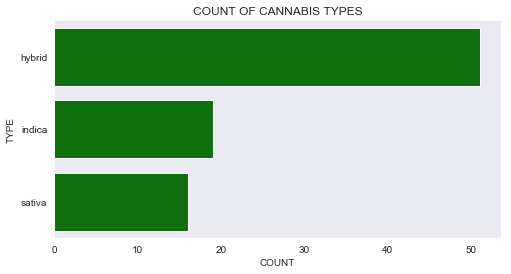

hybrid    51
indica    19
sativa    16
Name: type, dtype: int64


In [13]:
# countplot of cannabis types
plt.figure(figsize=(8,4))

sns.countplot(y=df.type, 
              order=df.type.value_counts().index, 
              color='green'
             )

plt.title('COUNT OF CANNABIS TYPES')
plt.xlabel('COUNT')
plt.ylabel('TYPE')

plt.show()

# print totals
print(df.type.value_counts())

#### Observations  
- Hybrid strains outnumber indica and sativa strains combined. 

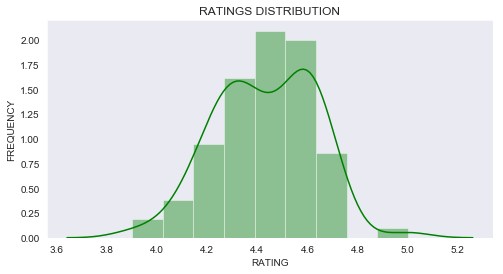

Mean Rating:
4.431395348837209


In [14]:
# ratings distribution
plt.figure(figsize=(8,4))

sns.distplot(df.rating, color='green')

plt.title('RATINGS DISTRIBUTION')
plt.xlabel('RATING')
plt.ylabel('FREQUENCY')

plt.show()

print('Mean Rating:')
print(df.rating.mean())

#### Observations  
- Rating distribution appears normal around a mean score of 4.4.
- There are little to no ratings below about 3.75, which to me indicates that even a bad cannabis strain is still pretty good.  
- Let's break down average rating by cannabis type.

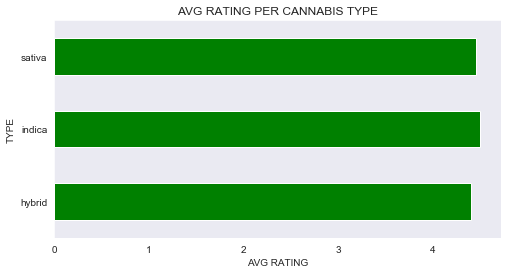

Average rating per cannabis type:

type
hybrid    4.400000
indica    4.494737
sativa    4.456250
Name: rating, dtype: float64


In [15]:
# rating by cannabis type
plt.figure(figsize=(8,4))

type_rating = df.groupby(['type'])['rating'].mean()

type_rating.plot.barh(color='green')
plt.title('AVG RATING PER CANNABIS TYPE')
plt.xlabel('AVG RATING')
plt.ylabel('TYPE')

plt.show()

print('Average rating per cannabis type:')
print('')
print(type_rating)

#### Observations  
- All three types of cannabis have similar mean rating scores ranging from 4.4 - 4.5.
- Let's look at the top strains by rating.

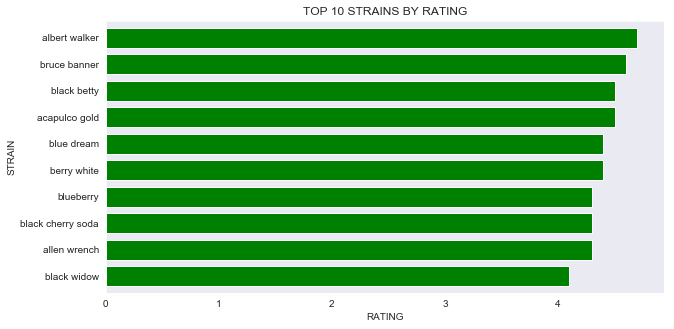

In [16]:
# top 10 strains by rating
top_10 = df_terps.groupby(['name_ocp'])['rating'].mean().head(10).sort_values(ascending=True)

top_10.plot.barh(figsize=(10,5), width=.75, color='green')

plt.title('TOP 10 STRAINS BY RATING')
plt.xlabel('RATING')
plt.ylabel('STRAIN')

plt.show()

#### Observations  
- The top five highest rated strains:  
    > 1. Albert Walker  
    > 2. Bruce Banner  
    > 3. Black Betty  
    > 4. Acapulco Gold  
    > 5. Blue Dream  

### Cannabinoids and Terpenes

In [17]:
# basic stats about terpene dataset
df_terps.describe()

,rating,bisabolol,caryophyllene,cbd,guaiol,humelene,limonene,linalool,myrcene,nerolidol,ocimene,pinene,terpinolene,thc
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,4.431395,0.241163,2.855465,11.555465,0.194651,0.820349,2.297674,0.725349,4.205349,0.014419,0.460814,0.869884,1.362907,191.149651
std,0.198975,0.318287,2.131959,34.026758,0.343531,0.756793,1.763157,0.792195,3.545915,0.055341,1.022793,1.181124,3.059234,69.625130
min,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.540000
25%,4.300000,0.000000,1.472500,0.000000,0.000000,0.292500,0.915000,0.192500,1.527500,0.000000,0.000000,0.000000,0.000000,151.250000
50%,4.400000,0.120000,2.185000,0.000000,0.000000,0.770000,1.710000,0.535000,3.760000,0.000000,0.000000,0.505000,0.040000,201.500000
75%,4.600000,0.407500,3.777500,0.000000,0.287500,1.172500,3.440000,0.985000,5.912500,0.000000,0.202500,1.215000,0.137500,237.950000
max,5.000000,1.300000,11.910000,150.000000,1.340000,4.590000,6.930000,4.820000,19.580000,0.270000,4.780000,5.400000,14.100000,313.910000


#### Observations  
- CBD and THC have relatively high standard deviations, implying ample variability among these variables.
- One strange thing of note: there are multiple columns that contain only positive real values (and zeros) but are showing zeros for the interquartiles. I cannot explain how it is possible to have no negative numbers in the column, a positive max value, but a median of zero. There is no missing data, and nan and infinite values were checked for.  
- The minimum rating for the entire dataset is 3.9. Ratings are subjective, but this implies cannabis is similar to pizza in the sense that even when it's bad, it is still pretty good.  
- __TAKEAWAY:__ cannabis is popular.

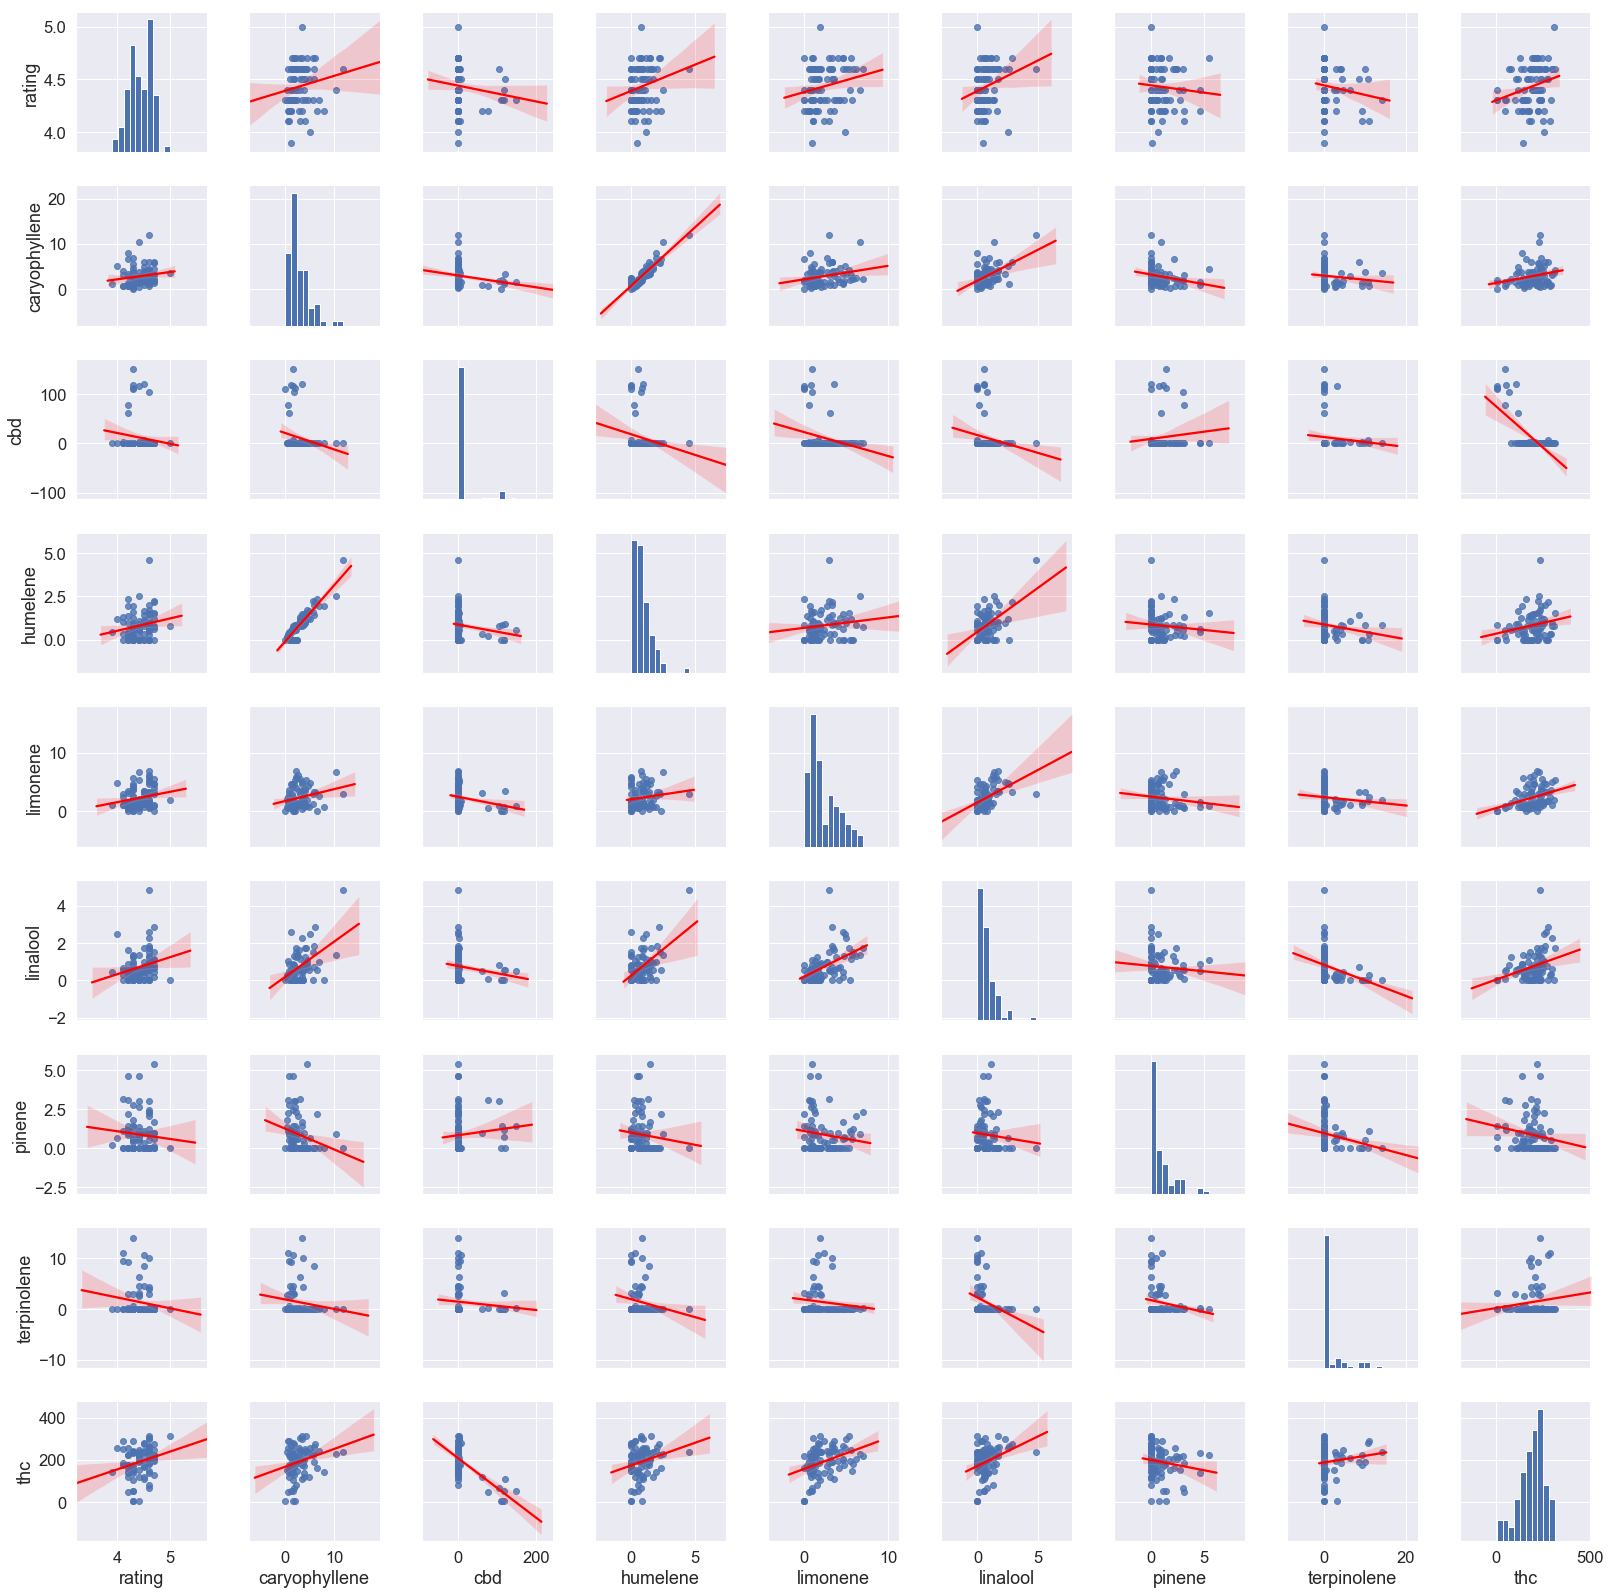

In [18]:
# chemical makeup pairplots
sns.set(font_scale=1.5)

terps = df_terps[['rating',
                  'caryophyllene',
                  'cbd',
                  'humelene',
                  'limonene',
                  'linalool',
                  'pinene',
                  'terpinolene',
                  'thc'
                 ]]

sns.pairplot(terps, 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}}
            )

plt.show()

#### Observations  
- Overt positive correlations:  
    > - rating and thc
    > - rating and caryophyllene  
    > - rating and humelene  
    > - rating and linalool  
    > - caryophyllene and humelene  
    > - caryophyllene and linalool  
    > - humelene and linalool  
    > - limonene and linalool  
 
- Overt negative correlations:  
    > - cbd and almost every other terpene, most notably thc 
    > - terpinolene and almost every othe terpene, most notably linalool
    > - pinene and caryophyllene
    > - pinene and terpinolene  
    > - pinene and thc  
    
- __TAKEAWAY:__ the major players appear to be THC, CBD, caryophyllene, humelene, and linalool.

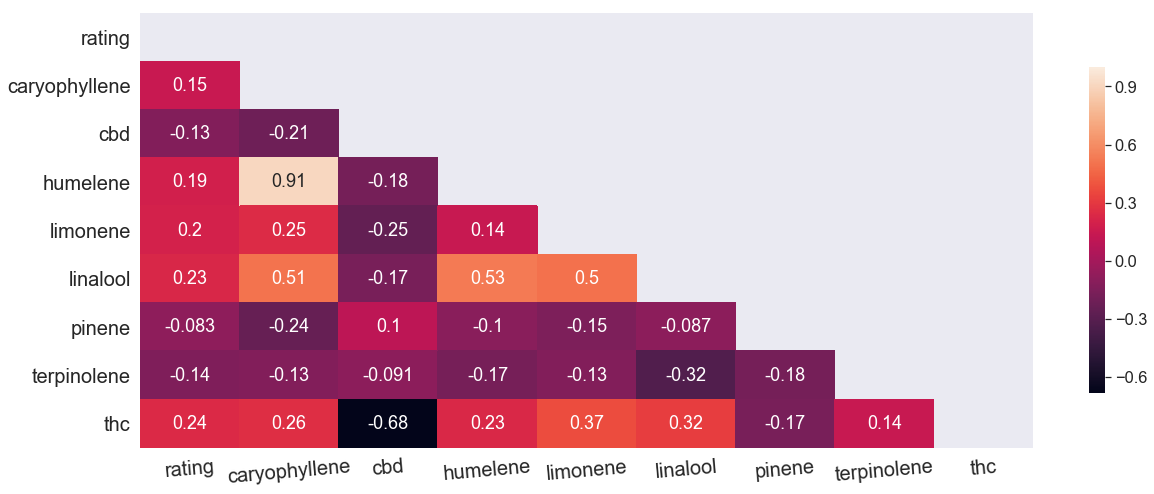

In [19]:
# heatmap correlation matrix key terpenes
corr = terps.corr()

# generate mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,8))
sns.heatmap(corr, mask=mask, annot=True, cbar_kws={"shrink": .75})

plt.tick_params(which='major', labelsize=20)
plt.xticks(rotation=5)

plt.show()

#### Observations  
- Humelene and caryophyllene are highly correlated at 0.91.  
- Humelene and linalool and fairly correlated at 0.53.  
- THC and CBD are negatively correlated with each other at -0.68.  
- Here again, the major players appear to be THC, CBD, caryophyllene, humelene, and linalool.

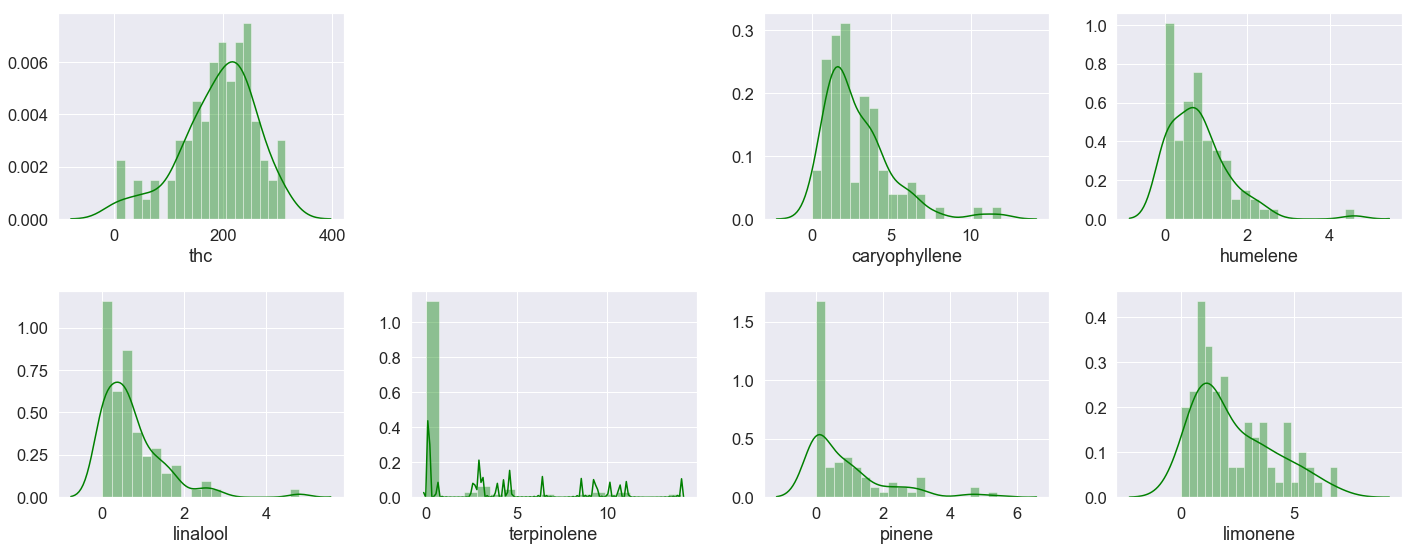

In [20]:
# key terpene distributions
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)

plt.subplot(2,4,1)
sns.distplot(df_terps.thc, bins=20, color='green')

#plt.subplot(2,4,2)
#sns.distplot(df_terps.cbd, bins=20, color='green')

plt.subplot(2,4,3)
sns.distplot(df_terps.caryophyllene, bins=20, color='green')

plt.subplot(2,4,4)
sns.distplot(df_terps.humelene, bins=20, color='green')
          
plt.subplot(2,4,5)
sns.distplot(df_terps.linalool, bins=20, color='green')
          
plt.subplot(2,4,6)
sns.distplot(df_terps.terpinolene, bins=20, color='green')
          
plt.subplot(2,4,7)
sns.distplot(df_terps.pinene, bins=20, color='green')
          
plt.subplot(2,4,8)
sns.distplot(df_terps.limonene, bins=20, color='green')

plt.tight_layout()
plt.show()

#### Observations  
- THC distribution appears relatively normal with a mean of 19% potency.
- Max THC levels reach into the low 30%'s.  
- The rest of the distributions do not appear normal. I will wait to see if the non-normal distributions need to be addressed before modeling. 

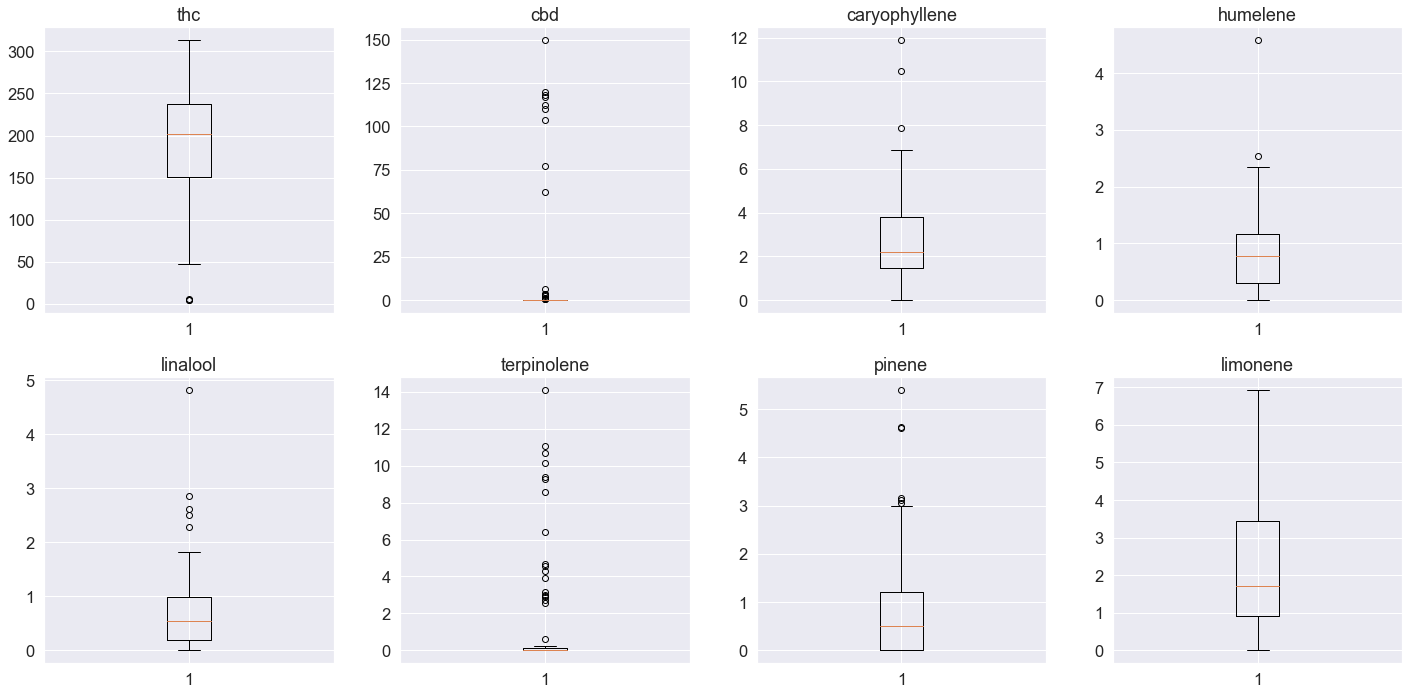

In [21]:
# key terpene boxplots
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.boxplot(df_terps.thc)
plt.title('thc')

plt.subplot(2,4,2)
plt.boxplot(df_terps.cbd)
plt.title('cbd')

plt.subplot(2,4,3)
plt.boxplot(df_terps.caryophyllene)
plt.title('caryophyllene')

plt.subplot(2,4,4)
plt.boxplot(df_terps.humelene)
plt.title('humelene')
          
plt.subplot(2,4,5)
plt.boxplot(df_terps.linalool)
plt.title('linalool')
          
plt.subplot(2,4,6)
plt.boxplot(df_terps.terpinolene)
plt.title('terpinolene')
          
plt.subplot(2,4,7)
plt.boxplot(df_terps.pinene)
plt.title('pinene')
          
plt.subplot(2,4,8)
plt.boxplot(df_terps.limonene)
plt.title('limonene')

plt.tight_layout()
plt.show()

#### Observations  
- Most of the CBD and terpinolene levels hover around zero with quite a few significant outliers.  
- All other terpenes appear relatively normal.  
- I know from experience that certain strains are spefically bred to achieve these outlier levels, so outliers will be kept for now and addressed if need be in the future.

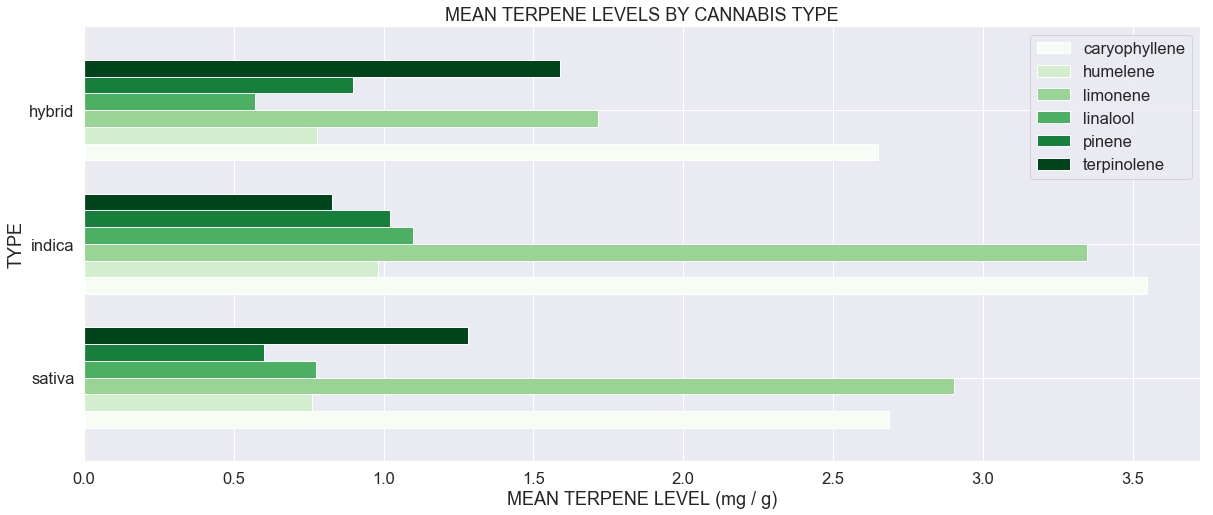

In [22]:
# mean terpene levels by cannabis type
df_terps.groupby(['type'])['caryophyllene',
                           'humelene',
                           'limonene',
                           'linalool',
                           'pinene',
                           'terpinolene'
                          ].mean().sort_values(by='type', 
                                               ascending=False
                                              ).plot.barh(figsize=(20,8), 
                                                          width=.75, 
                                                          colormap='Greens'
                                                         )

plt.title('MEAN TERPENE LEVELS BY CANNABIS TYPE')
plt.xlabel('MEAN TERPENE LEVEL (mg / g)')
plt.ylabel('TYPE')
plt.legend()

plt.show()

#### Observations    
Top three terpenes for each type
- Hyrbid:  
    > 1. Caryophyllene  
    > - Limonene    
    > - Terpinolene  
- Indica:  
    > 1. Caryophyllene  
    > - Limonene 
    > - Linalool  
- Sativa:  
    > 1. Limonene  
    > - Caryophyllene  
    > - Terpinolene  
    
- __TAKEAWAY:__ Caryophyllene and limonene are the top two terpenes found in all cannabis types.

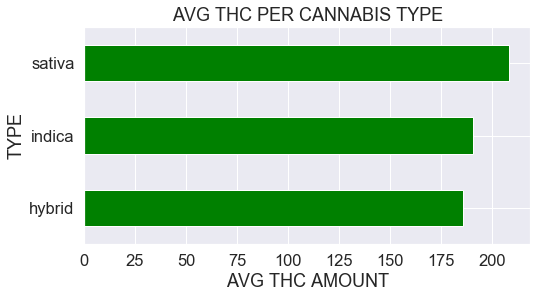

Average THC amount per cannabis type:

type
hybrid    185.802353
indica    190.962632
sativa    208.416250
Name: thc, dtype: float64


In [23]:
# average total thc by cannabis type
plt.figure(figsize=(8,4))

thc_type = df.groupby(['type'])['thc'].mean()

thc_type.plot.barh(color='green')
plt.title('AVG THC PER CANNABIS TYPE')
plt.xlabel('AVG THC AMOUNT')
plt.ylabel('TYPE')

plt.show()

print('Average THC amount per cannabis type:')
print('')
print(thc_type)

#### Observations  
- As a reminder, THC is the overall potency of the strain, its psychoactivity level, or how high you feel.
- Mean sativa THC levels are just under 21%, more than two percentage points higher in potency level than hyrbirds.  
- Indicas scored a mean of 19%, coming in second place of the three.  
- __TAKEAWAY:__ sativas, on average, tend to be more potent than indicas and hyrbids. 

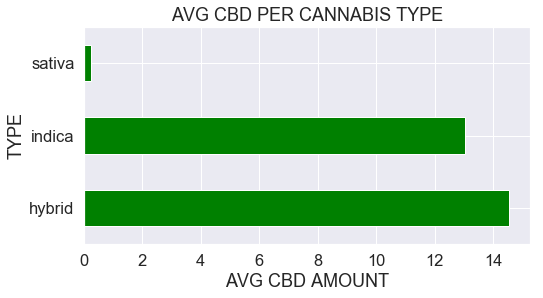

Average CBD amount per cannabis type:

type
hybrid    14.552353
indica    13.047368
sativa     0.231250
Name: cbd, dtype: float64


In [24]:
# average total cbd by cannabis type
plt.figure(figsize=(8,4))

cbd_type = df.groupby(['type'])['cbd'].mean()

cbd_type.plot.barh(color='green')
plt.title('AVG CBD PER CANNABIS TYPE')
plt.xlabel('AVG CBD AMOUNT')
plt.ylabel('TYPE')

plt.show()

print('Average CBD amount per cannabis type:')
print('')
print(cbd_type)

#### Observations    
- As a reminder, besides THC, CBD is the other major cannabinoid found in the cannabis plant. The industry standard when listing a strain for a sale is displaying its THC and CBD levels only.  
- CBD is non-psychoactive but is believed to play a role in the reduction of anxiety, inflammation, and pain.  
- Mean CBD levels for indicas and hyrids are similar at around 1.4%.  
- Sativas' mean CBD level are almost non-existent.  
- __TAKEAWAY:__ if a customer is looking for the benefits of CBD, they should stick with indicas and hybrids and avoid sativas.

## Flavors and Effects

In [25]:
# rank and list frequency of flavors
flavors = df_flavors.drop(['name_ocp', 'type', 'rating'], axis=1)
flavors_sum = (flavors==1).sum(axis=0).sort_values(ascending=False).head(10)

flavors_sum

sweet           54
earthy          54
citrus          19
pungent         18
berry           17
pine            13
woody           11
diesel           8
spicy_herbal     8
tropical         7
dtype: int64

#### Observations  
- The most frequent flavors among all cannabis types are:  
    > 1. Sweet  
    > 2. Earthy  
    > 3. Citrus  
    > 4. Pungent  
    > 5. Berry  
        
- Let's plot the top five flavors broken down by cannabis type.

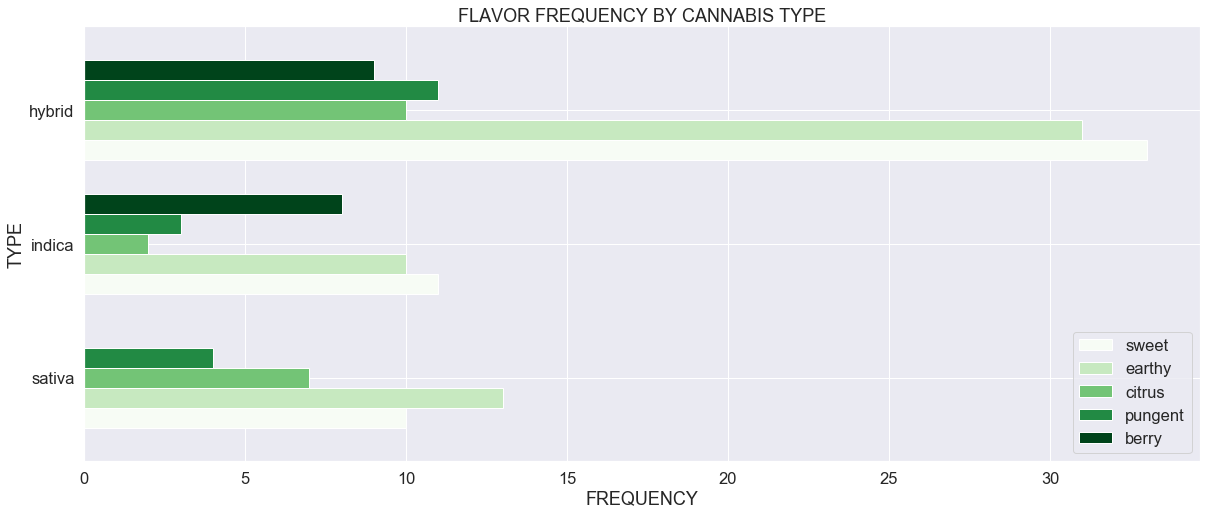

In [26]:
# top 10 flavors by cannabis type

df_flavors.groupby(['type'])['sweet',
                             'earthy',
                             'citrus',
                             'pungent',
                             'berry'].sum().sort_values(by='type', 
                                                        ascending=False
                                                       ).plot.barh(figsize=(20,8), 
                                                                   width=.75, 
                                                                   colormap='Greens'
                                                                  )

plt.title('FLAVOR FREQUENCY BY CANNABIS TYPE')
plt.xlabel('FREQUENCY')
plt.ylabel('TYPE')

plt.show()

#### Observations  
- Hybrid top three flavors:  
    > 1. Sweet  
    > 2. Earthy  
    > 3. Pungent  
    
- Indica top three flavors:  
    > 1. Sweet  
    > 2. Earthy  
    > 3. Berry  
    
- Sativa top three flavors:  
    > 1. Earthy  
    > 2. Sweet  
    > 3. Citrus
    
- __TAKEAWAY:__  
    > - Earthy and sweet are common among all cannabis types.  
    > - Hybrids are distinguished by pungent flavors.   
    > - Indicas are distinguished by berry flavors.  
    > - Sativas are distinguished by citrus flavors.  

In [27]:
# rank and list top 10 effects by frequency
effects = df_effects.drop(['name_ocp', 'type', 'rating'], axis=1)
effects_sum = (effects == 1).sum(axis=0).sort_values(ascending=False).head(10)

effects_sum

happy        82
euphoric     78
uplifted     76
relaxed      70
focused      28
sleepy       27
creative     25
energetic    24
hungry        7
talkative     4
dtype: int64

#### Observations  
- The most frequent effects are:  
    > 1. Happy  
    > 2. Euphoric  
    > 3. Uplifted  
    > 4. Relaxed  
    > 5. Focused  
    
- Let's plot the top five effects broken down by cannabis type.

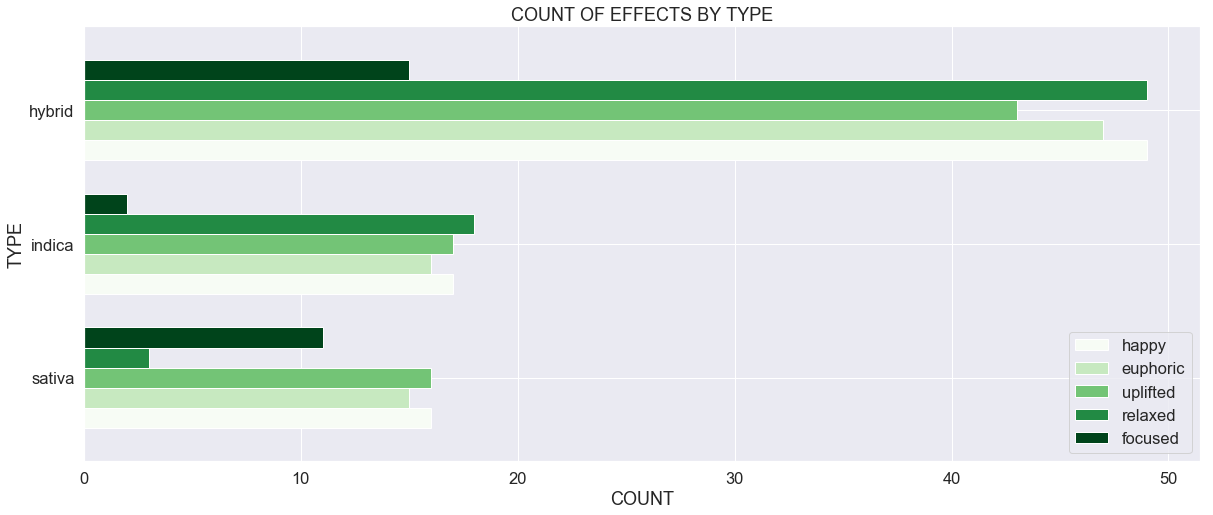

In [28]:
# top 5 effects by cannabis type

df_effects.groupby(['type'])['happy',
                             'euphoric',
                             'uplifted',
                             'relaxed',
                             'focused'
                            ].sum().sort_values(by='type', 
                                               ascending=False
                                              ).plot.barh(figsize=(20,8), 
                                                          width=.75, 
                                                          colormap='Greens'
                                                         )

plt.title('COUNT OF EFFECTS BY TYPE')
plt.xlabel('COUNT')
plt.ylabel('TYPE')

plt.show()

#### Observations  
- Hybrid top three effects:  
    > 1. Euphoric  
    > 2. Happy  
    > 3. Relaxed  
- Indica top three effects:  
    > 1. Uplifted  
    > 2. Relaxed  
    > 3. Happy  
- Sativa top three effects:  
    > 1. Uplifted  
    > 2. Happy  
    > 3. Energetic  
- __TAKEAWAY:__  
    > - Feeling happy is common among all cannabis types.  
    > - Hybrids are distinguished by feeling euphoric.  
    > - Indicas are distinguished by feeling uplifted.  
    > - Sativas are distinguished by feeling energetic.  

## Principal Component Analysis

In [29]:
# create new dataframe for modeling including:

# type and rating
# top seven flavors
# top eight effects
# top six terpenes plus thc and cbd

df_model = df[['type',
               'rating',
               'thc',
               'cbd',
               'limonene',
               'linalool',
               'terpinolene',
               'humelene',
               'pinene',
               'caryophyllene',
               'creative',
               'euphoric',
               'focused',
               'happy',
               'relaxed',
               'sleepy',
               'energetic',
               'uplifted',
               'berry',
               'citrus',
               'earthy',
               'pungent',
               'sweet',
               'woody',
               'pine'
              ]]

print('Shape of new key variables dataframe for modeling:')
df_model.shape

Shape of new key variables dataframe for modeling:


(86, 25)

In [30]:
# principal component analysis
# normalize data
features = df_model.drop(['type', 'rating'], axis=1)

x = features
features_norm = (x-x.min())/(x.max()-x.min())

# define n components and fit transform
pca = PCA(n_components=3, random_state=123)
pca.fit_transform(features_norm)
pca_results = pca.fit_transform(features_norm)

# print pca table ranking features with each component
pd.DataFrame(pca.components_, 
             columns=features_norm.columns, 
             index=['PC1','PC2', 'PC3']
            )

,thc,cbd,limonene,linalool,terpinolene,humelene,pinene,caryophyllene,creative,euphoric,...,sleepy,energetic,uplifted,berry,citrus,earthy,pungent,sweet,woody,pine
PC1,-0.026431,0.048952,-0.026567,-0.021505,-0.025354,-0.026989,-0.013547,-0.031316,-0.040050,-0.053952,...,-0.388575,0.423661,-0.028889,-0.275120,0.221605,0.150787,-0.034152,-0.241129,0.164412,0.189338
PC2,0.063551,-0.124987,-0.011249,-0.000139,0.010741,0.039648,-0.025830,0.050796,0.564728,0.116252,...,-0.347659,0.145007,-0.001467,0.057548,0.280773,-0.518796,-0.146921,0.132124,-0.220535,0.059226
PC3,-0.050328,0.077851,-0.140969,-0.017041,0.009270,-0.021314,-0.013565,-0.021264,0.100057,-0.141548,...,0.183113,-0.300042,-0.131768,-0.167987,0.122177,-0.286757,-0.151139,-0.698538,0.159230,0.281721


#### Observations  
- Energetic effect is the principal factor in PCA1 at 42%.
- Creative effect is the principal factor in PCA2 at 56%.  
- Pine flavor is the principal factor in PCA3 at 28%.  
- __TAKEAWAY:__ no one terpene or effect is responsible for most of the variance in each principal component. The variance seems to be fairly evenly spread among a handful of different terpenes and effects per component.

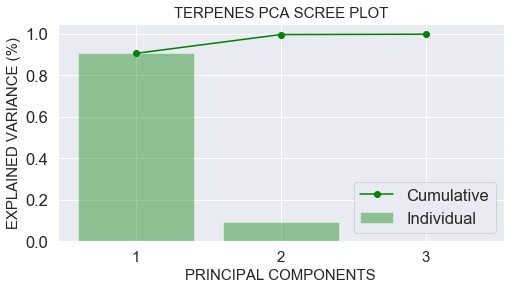

,Component,Indiv,cum_sum
0,1,0.905853,0.905853
1,2,0.090681,0.996534
2,3,0.001626,0.998160


In [31]:
# pca scree plot
x = features
features_norm = (x-x.min())/(x.max()-x.min())
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(x)

fig, ax = plt.subplots(figsize=(8, 4))

# bar plot
plt.bar(range(len(pca.explained_variance_ratio_)), 
        pca.explained_variance_ratio_, 
        label='Individual', 
        axes=ax, 
        alpha=0.4, 
        color='green'
       )

# line plot 
plt.plot(range(len(pca.explained_variance_ratio_)), 
         pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', 
         color='green', 
         axes=ax, 
         marker='o'
        )

plt.title('TERPENES PCA SCREE PLOT', fontsize=15)
plt.ylabel('EXPLAINED VARIANCE (%)', fontsize=15)
plt.xlabel('PRINCIPAL COMPONENTS', fontsize=15)
ax.set_xticks(range(0,3))
ax.set_xticklabels(range(1,4), fontsize=15)
plt.legend()

plt.show()

# define and print scree table
df_scree = pd.DataFrame({'Component':['1','2','3'], 
                         'Indiv':pca.explained_variance_ratio_
                        })
df_scree['cum_sum'] = df_scree['Indiv'].cumsum()
df_scree

#### Observations  
- 91% of the variance can be explained by PCA1.  
- 99.7% of the variance can be explained by PCA1 and PCA2.  
- PCA3 adds neglible value to explained variance.  

- __TAKEAWAY:__ essentially all of the variance in the new modeling dataset can be explained and represented using two principal components instead of 24 features.

In [32]:
# define pca components and fit data
pca = PCA(n_components=2, random_state=123)
pca_results = pca.fit_transform(x)

# pca results table
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2']
df_pca.head()

,PC1,PC2
0,-32.931151,0.068582
1,-54.461396,8.196235
2,45.692295,-29.563332
3,-62.844173,11.350831
4,85.316190,21.748870


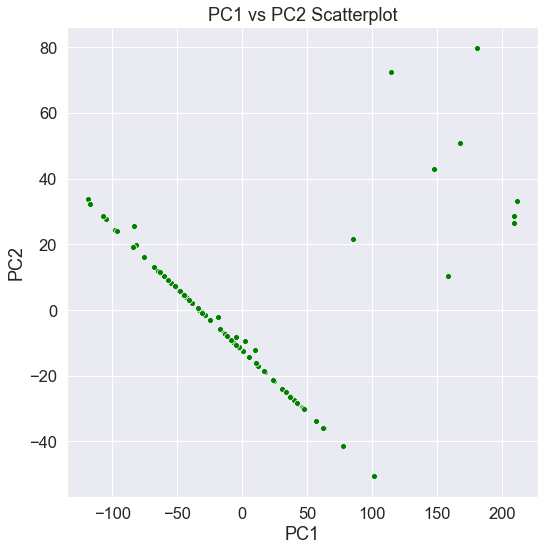

In [33]:
# 2D pca scatterplots - different arrangements
plt.figure(figsize=(8,8))

# pca1 vs pca2
sns.scatterplot(data=df_pca, 
                x='PC1', 
                y='PC2', 
                color='green'
               )
plt.title('PC1 vs PC2 Scatterplot')

plt.tight_layout()
plt.show()

#### Observations  
- The datapoints appear relatively flat and follow along a symmetrical line down and to the right.  
- There are some outliers, but as discussed earlier, these outliers are not errors. Some cannabis strains are specifically bred to be outliers, and therefore, are kept in the data.  
- Next I will plot the same information in three dimensions to get a better sense of the physical shape of the data.

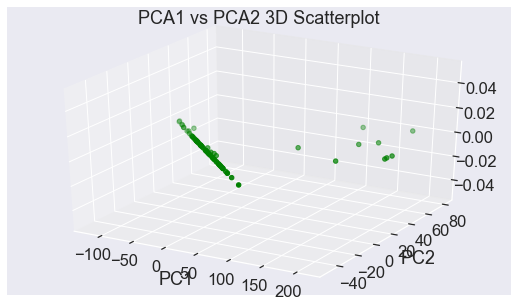

In [65]:
# 3D pca scatterplots - different arrangements
fig = plt.figure(figsize=(7,4))
ax = Axes3D(fig)
ax.scatter(df_pca.PC1, 
           df_pca.PC2, 
           color='green'
          )

plt.title('PCA1 vs PCA2 3D Scatterplot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

#### Observations  
- The three dimensional plot above is very similar to the previous two dimensional plot.  
- Most of the datapoints fall within a similar symmetrical range just like the 2D plot, so not much was gained from this additional plot, other than confirming the shape previously seen in the 2D plot. 

## Supervised Modeling / Recommender 1

In [35]:
# setting X and y
features = df_model.drop(['type'], axis=1)
X = features
y = df_model.type
feature_name = X.columns.tolist()

In [36]:
# train/test split 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print train/test shapes
print("X_train shape: ", X_train.shape)
print('')
print("X_test shape: ", X_test.shape)

X_train shape:  (68, 24)

X_test shape:  (18, 24)


In [37]:
# define threshold
thresh = 5 * 10**(-3.5)

# gradient boosting model
model = GradientBoostingClassifier()

# fit model
model.fit(X_train, y_train)

#select features using threshold and gradient boosting classifier
selection = SelectFromModel(model, threshold=thresh, prefit=True)

# transform
X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

# print train/test shapes
print("X_important_train shape: ", X_important_train.shape)
print('')
print("X_important_test shape: ", X_important_test.shape)

X_important_train shape:  (68, 16)

X_important_test shape:  (18, 16)


## Modeling Pipeline

Support Vector Machine: 0.794118 (+/- 0.050943)
K-nearest Neighbor: 0.779412 (+/- 0.064101)
Logistic Regression: 0.735294 (+/- 0.106046)
Ridge Regression: 0.750000 (+/- 0.087001)
Bagging Ridge: 0.735294 (+/- 0.121268)
Decision Tree: 0.691176 (+/- 0.096433)
Random Forest: 0.794118 (+/- 0.065767)


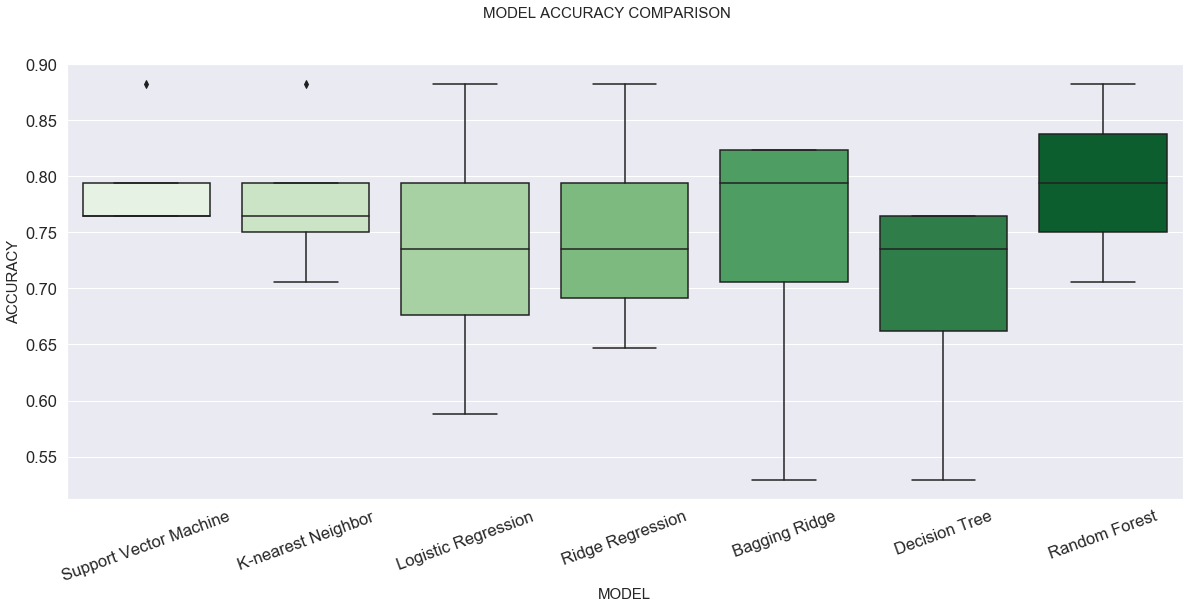

In [38]:
clfs = []
seed = 3

clfs.append(("Support Vector Machine", 
             Pipeline([("Scaler", StandardScaler()),
                       ("Support Vector Machine", SVC())])))

clfs.append(("K-nearest Neighbor", 
             Pipeline([("Scaler", StandardScaler()),
                       ("K-nearest Neighbor", KNeighborsClassifier())])))

clfs.append(("Logistic Regression", 
             Pipeline([("Scaler", StandardScaler()),
                       ("Logistic Regression", LogisticRegression())])))

clfs.append(("Ridge Regression", 
             Pipeline([("Scaler", StandardScaler()),
                       ("Ridge Regression", RidgeClassifier())])))

clfs.append(("Bagging Ridge",
             Pipeline([("Scaler", StandardScaler()),
                       ("Bagging Ridge", BaggingClassifier())])))

clfs.append(("Decision Tree", 
             Pipeline([("Scaler", StandardScaler()),
                       ("Decision Tree", DecisionTreeClassifier())])))

clfs.append(("Random Forest", 
             Pipeline([("Scaler", StandardScaler()),
                       ("Random Forest", RandomForestClassifier())]))) 

scoring = 'accuracy'
n_folds = 3

results, names = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds)
    cv_results = cross_val_score(model, 
                                 X_important_train, 
                                 y_train, 
                                 cv=4, 
                                 scoring=scoring, 
                                 n_jobs=-1
                                )    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot model comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('MODEL ACCURACY COMPARISON', fontsize=15)
ax = fig.add_subplot(111)

sns.boxplot(x=names, 
            y=results, 
            palette='Greens'
           )

ax.set_xticklabels(names)
ax.set_xlabel('MODEL', fontsize=15)
ax.set_ylabel('ACCURACY', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

#### Observations  
- Top three performing models:  
    > 1. Support vector machine (79.4% accuracy +/- 5%)
    > 2. K-nearest neighbor (77.9% accuracy +/- 2.5%)
    > 3. Random forest (79.4% accuracy +/- 6.6%)  
- Accuracy scores are not too bad considering the small dataset and using each model's default settings.  
- Next I will try some parameter tuning on support vector machine and k-nearest neighbor to see if we can improve these accuracy scores.

## Support Vector Machine Parameter Tuning  

In [39]:
# define search parameters (searched also for 'poly' and 'sigmoid' kernels)
params_svm = {'kernel':('linear', 'rbf'),
                'C':[1, 2, 3], 
                'gamma':[0.01, 0.10, 0.5]
               }

svm = SVC()

# grid search
svm_model = GridSearchCV(estimator=svm, 
                         param_grid=params_svm, 
                         verbose=1, 
                         n_jobs=-1, 
                         cv=5
                        )

# fit model
svm_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'gamma': [0.01, 0.1, 0.5],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [40]:
# print train score
print('Training score:')
print(svm_model.score(X_important_train, y_train))

print('')

# print optimal parameters
print('Support vector machines optimal parameters:')
print(svm_model.best_params_)

Training score:
0.8823529411764706

Support vector machines optimal parameters:
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


#### Observations  
- Support vector machines achieved a training accuracy score of 88.2% using the prescribed optimal parameters. This score is 9 percentage points increase over the accuracy score achieved by using the default parameters (79%).  
- Using GridSearchCV, the algorithm discovered that the optimal parameters are (C=1, gamma=0.01, and kernel='linear').  
- Next I will apply the optimal parameters and run the model on the test group.

In [41]:
# predict with X_test
svm_model = SVC(C=1, 
                gamma=0.01, 
                kernel='linear'
               )
svm_model.fit(X_important_train, y_train)
y_pred = svm_model.predict(X_important_test)

# print results
print('Test accuracy score:')
print(accuracy_score(y_test,y_pred))

print('')

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('')

print('Classification report:')
print(classification_report(y_test, y_pred))

Test accuracy score:
0.7777777777777778

Confusion matrix:
[[9 1 1]
 [1 2 0]
 [1 0 3]]

Classification report:
              precision    recall  f1-score   support

      hybrid       0.82      0.82      0.82        11
      indica       0.67      0.67      0.67         3
      sativa       0.75      0.75      0.75         4

    accuracy                           0.78        18
   macro avg       0.74      0.74      0.74        18
weighted avg       0.78      0.78      0.78        18



#### Observations  
- Test score accuracy dropped a bit from the training score to 77.8%.   
- One possible reason for the drop in accuracy could simply be the small train and test sets. It could very well be the case that with many more samples this model would produce more accurate results.  
- Predicting hybrids found the most overall accuracy. Precision is 82% and recall 82%, lending to an f1-score of 82%. This makes sense as over half of all cannabis strains are hybrids. The more samples of a category, the more accurate the prediction will presumably be.  
- The worst performing predictions were related to indica strains. Precision is 67% and recall 67%, with an f1-score of 67%.  
- Overall accuracy for predicting sativas was slightly less than the top performing hybrids. Precision, recall, and f1-score were all 75%.  
- __TAKEAWAY:__ despite the small dataset, the support vector machines model predicted two out of three categories with >= 75% precision and recall. It is logical to speculate these accuracy scores would be significantly improved with a many more samples to train and test on. 

## K-nearest Neighbor Parameter Tuning

In [42]:
# search for optimal value k
# list of integers matching amount of features in model
k_range = range(1, 11)

# create empty list
k_scores = []

# loop through values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, 
                             X, 
                             y, 
                             cv=4, 
                             scoring='accuracy'
                            )
    k_scores.append(scores.mean())

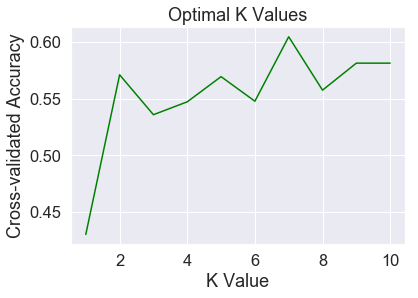

In [43]:
# plot optimal k values
plt.plot(k_range, k_scores, color='green')

plt.title('Optimal K Values')
plt.xlabel('K Value')
plt.ylabel('Cross-validated Accuracy')

plt.show()

#### Observations  
- There are three peaks on the above chart, indicating k values of 2, 5, and 7 to have the highest cross-validation scores. 
- K values 2, 5, and 7 will be used in the following grid search to discover optimal parameters for the model.

In [44]:
# define parameters to search for
grid_params = {'n_neighbors': [2,5,7],
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']
              }

# create parameter grid dictionary
#param_grid = dict(n_neighbors=k_range)

# define knn
knn_model = GridSearchCV(KNeighborsClassifier(), 
                   verbose=1, 
                   cv=4, 
                   param_grid=grid_params, 
                   n_jobs=-1
                  )

knn_model.fit(X_important_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 5, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [45]:
# print train score
print('Training score:')
print(knn_model.score(X_important_train, y_train))

print('')

# print knn best parameters
print('KNN optimal parameters:')
knn_model.best_params_

Training score:
0.6617647058823529

KNN optimal parameters:


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

#### Observations  
- Train score accuracy is 66.2%, performing worse so far than the support vector machine model.  
- GridSearchCV indicates that the optimal parameters for the model are (metric='manhattan', n_neighbors=2, weights='uniform').  
- Let's run the model using these optimal parameters to see if accuracy scores improve.

In [46]:
# preprocessing
# define features and target
features = df_model.drop(['type'], axis=1)
X = features
y = df_model.type

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (86, 24)
Y vector dimensionality: (86,)


In [47]:
# define knn model using optimal parameters
# predict with X_test
knn_model = KNeighborsClassifier(metric='manhattan', 
                                 n_neighbors=2, 
                                 weights='uniform'
                                )

# fit model
knn_model.fit(X_important_train, y_train)

# predict
y_pred = knn_model.predict(X_important_test)

# cross validation scores
scores = cross_val_score(knn_model, 
                         X, 
                         y, 
                         cv=4, 
                         scoring='accuracy'
                        )

print('Cross validation scores:')
print(scores)

print('')

print('Mean cross validation score:')
print(scores.mean())

print('')

print('Test accuracy score:')
print(accuracy_score(y_test,y_pred))

print('')

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('')

print('Classification report:')
print(classification_report(y_test, y_pred))

Cross validation scores:
[0.59090909 0.59090909 0.61904762 0.61904762]

Mean cross validation score:
0.604978354978355

Test accuracy score:
0.5555555555555556

Confusion matrix:
[[10  0  1]
 [ 3  0  0]
 [ 4  0  0]]

Classification report:
              precision    recall  f1-score   support

      hybrid       0.59      0.91      0.71        11
      indica       0.00      0.00      0.00         3
      sativa       0.00      0.00      0.00         4

    accuracy                           0.56        18
   macro avg       0.20      0.30      0.24        18
weighted avg       0.36      0.56      0.44        18



c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Observations  
- Mean cross-validation score decreased from 69% to 60.5%.  
- Test score accuracy dropped significantly to 55.6%.    
- Predicting hybrids found the most overall accuracy again. Precision is 59% and recall 91%, with an f1-score of 71%. As a reminder, hybrids account for over half of all cannabis strains, so hybrids far outnumber the other two strain types in train and test sets.  
- Both indica and sativa posted zeros across the board for precision, recall, and f1-score.   
- __TAKEAWAY:__ using the current dataset, the support vector machine model, using optimal parameters, was the best performing model. KNN's final test prediction score was 55.6%, while SVM scored 72.2% in its test prediction. With a bigger dataset and more samples to train and test on, it is logical to speculate these accuracy scores could improve. 

## Natural Language Processing / Recommender 2  
Recommender 2 looks for __similarities between the descriptions of cannabis strains__. This recommender uses the common __TfidVectorizer__ algorithm, which converts the description of the strain into a matrix of TF-IDF (term frequency-inverse document frequency) features. TF-IDF is essentially a statistic that __reflects how important a word is to a document in a collection__. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the collection that contain the word, which helps to adjust for the fact that some words appear more frequently than others.  

In this case, the document is the individual strain description, and the collection encompasses the entire column of descriptions. The TfidVectorizer algorithm will __take the input of the strain you would like to compare, look for word frequencies and similarities in the descriptions, and output the top five most similar strains to the input strain__.

In [48]:
# define tfidvectorizer parameters
tfv = TfidfVectorizer(min_df=3, 
                      max_features=None, 
                      strip_accents='unicode', 
                      analyzer='word', 
                      token_pattern=r'\w{1,}', 
                      ngram_range=(1,3), 
                      use_idf=1, 
                      smooth_idf=1, 
                      sublinear_tf=1, 
                      stop_words='english'
                     )

# fill na's with empty string
df.description = df.description.fillna('')

# fit model to description column
tfv_matrix = tfv.fit_transform(df.description)

# print shape
tfv_matrix.shape

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(86, 1033)

In [80]:
# recommender function
def recommend_strain(strain_name):
    list_of_strains = list(df.name_ocp)
    idx = list_of_strains.index(strain_name)
    strain = df.name_ocp.iloc[idx]
    indices = pd.Series(df.index, index=df.name_ocp)
    SIG = []

    # for loop
    for i in list(df.name_ocp):
        idx = indices[i]
        idx_ = indices[strain_name]
        sig = sigmoid_kernel(tfv_matrix[idx], tfv_matrix[idx_])
        SIG.append(sig[0][0])
        
    df_match = pd.DataFrame({'strain': list(df.name_ocp), 'similarity': SIG})
    print(df_match[1:].sort_values(by=['similarity'], ascending=False).head(6))

In [81]:
# input strain 
recommend_strain('dogwalker og')

           strain  similarity
18   dogwalker og    0.762000
39   kush cleaner    0.761680
59     obama kush    0.761677
67  albert walker    0.761670
84          og 18    0.761667
21   quantum kush    0.761665


## Summary and Conclusion

### Exploratory Data Analysis  
After the dataset was loaded, __duplicate rows were dropped__, followed by __reshaping and renaming variables__ in the dataset for ease and efficiency of coding. __Subset dataframes were then created__ for cannabinoids and terpenes, effects, and flavors. Afterwards, __missing values were checked__ for, and thankfully, the dataset contained zero missing data.  

From here, various plots helped illuminate some key insights about the overall dataset:  
- Hybrid strains account for over half of all cannabis strains in the dataset.  
- Mean rating for all strains is 4.4. There are no ratings below 3.9.  
    
After getting an overall sense of the dataset, a more detailed look was given to __cannabinoids and terpenes__. Below are some important findings:  
- THC and CBD, the two most prominent cannabinoids in cannabis, both have high standard deviations, indicating high variability. This alines with reality as growers have been very focused on breeding specific levels of CBD and THC for decades.  
- THC, the most prominent cannabinoid in cannabis, has a mean potency level of 19% and a max potency level of 31%.  
- __Sativas, on average, tend to be more potent than indicas and hybrids.__
- Notable positive correlation: the more potent the strain (high THC levels), the higher the rating.  
- Notable negative correlation: high amounts of CBD in a strain is correlated with lower amounts of almost every other terpene, and vice a versa.  
- __If a customer is looking for the benefits of CBD, they should stick with indicas and hybrids and avoid sativas.__
- The major cannabinoids and terpenes found across all cannabis types appear to be THC, CBD, caryophyllene, humelene, and linalool.
    
The final portion of the exploratory data analysis stage was concerned with the __flavors and effects__ of different cannabis types. Here are some key takeaways:  

__Flavors__
- __Earthy and sweet are common among all cannabis types.__  
- Hybrids are distinguished by pungent flavors.   
- Indicas are distinguished by berry flavors.  
- Sativas are distinguished by citrus flavors.  

__Effects__  
- __Feeling happy is common among all cannabis types.__  
- Hybrids are distinguished by feeling euphoric.  
- Indicas are distinguished by feeling uplifted.  
- Sativas are distinguished by feeling energetic.
    
### Principal Component Analysis  
Before performing PCA, I created a __subset dataframe__ using what was learned during the exploratory data analysis process. The new dataframe includes the type (target for supervised learning) and rating variables, __top seven flavors, top eight effects, and the top eight cannabinoids and terpenes.__

After the new dataframe was created, a table was plotted to show the explained variance by each variable to each principal component. The major takeaway here was that __no one terpene or effect is responsible for most of the variance in each principal component.__ The variance seems to be fairly evenly spread among a handful of different terpenes and effects per component.  

Next came the scree plot. This chart showed how much of the variance in the dataset could be explained by each principal component. Below is the summary of explained variance using three principal components.  
- 91% of the variance can be explained by PCA1.  
- __99.7% of the variance can be explained by PCA1 and PCA2.__  
- PCA3 adds neglible value to explained variance.  

If the principal components were going to be used in the modeling pipeline instead of the original variables, only PCA1 and PCA2 would be used. PCA3 would be dropped because it does not add any significant value to explained variance beyond the first two principal components.  

### Supervised Learning  / Recommender 1
A __modeling pipeline__ was created to efficiently run multiple models simultaneously. Although more models were checked than what is presented in this project, the __top two performing models__ overall (using default parameters) were:  
- Support vector machine (79.4% accuracy +/- 5% margin of error)
- K-nearest neighbor (77.9% accuracy +/- 2.5% margin of error)  

Using this information, __GridSearchCV was performed__ on SVM and KNN to identify the optimal parameters for each model. For SVM, the optimal parameters were (C=1, gamma=0.01, kernel='linear'). Here are some key findings after running the model using the optimal parameters:  
- __Test score accuracy dropped a little to 77.8%.__  
- One likely reason for the drop in accuracy could simply be the __small train and test sets.__ It could very well be the case that with many more samples this model would produce more accurate results.  
- Predicting hybrids found the most overall accuracy. Precision was 82% and recall 82%, with an f1-score of 82%. This makes sense as over half of all cannabis strains are hybrids. The more samples of a category, the more accurate the prediction will typically be.  
- The worst performing predictions were related to indica strains. Precision was 67% and recall 67%, with an f1-score of 67%.  
- Overall accuracy for predicting sativas was slightly less than the top performing hybrids. Precision, recall, and f1-score were all 75%.  
- Takeaway: __despite the small dataset, the support vector machines model predicted two out of three categories with >= 75% precision and recall.__ It is logical to speculate that these accuracy scores would be significantly improved with a many more samples to train and test on.  

__KNN's optimal parameters__ were (metric='manhattan', n_neighbors=2, weights='uniform'). Below are some insights after running the KNN model using the prescribed optimal parameters:  
- Mean cross-validation score decreased from 69% to 60.5%.  
- __Test score accuracy dropped significantly to 55.6%.__ 
- Predicting hybrids found the most overall accuracy again. Precision was 59% and recall 91%, with an f1-score of 71%. As a reminder, hybrids account for over half of all cannabis strains, so hybrids far outnumber the other two strain types in train and test sets.  
- Both indica and sativa posted zeros across the board for precision, recall, and f1-score.   

__Comparing SVM vs KNN:__ using the small current dataset, the __support vector machine model with optimal parameters was the best performing model for predicting__ the cannabis type correctly using a small subset of cannabinoids, terpenes, flavors, and effects. SVM's final test prediction score was 77.8%. __With a more robust dataset and more samples to train and test on, it is logical to speculate that these accuracy scores could improve significantly__.  

### Natural Language Processing / Recommender 2  
Recommender 2 runs correctly as intended. However, as with the above supervised models, I feel its accuracy is held back by the small size of the dataset. The only way to prove this would be to test it on a bigger dataset, which to my knowledge, does not exist yet. 

## Next Steps  
- Continue searching for or create a central database of strains and chemical laboratory results. The bigger the dataset, the more accurate the recommenders will be.  
- Start exploring other products besides cannabis flower to apply machine learning models and recommenders. Smokeable flower is only one product among many in the cannabis space. There are also edibles, oils, capsules, and topicals to name a few.  
- Apply further unsupervised models to potentially discover hidden groupings within the dataset that do not outwardly present themselves. This could include any number of clustering algorithms, including but not limited to, k-means, DBSCAN, and hierarchical models.  
- For Recommender 1, begin contacting dispensaries to gauge interest in being able to more consistently market cannabis strains based off of their scientific lab test results. 
- For Recommender 2, team up with a front-end developer or app builder to construct an end-user website or app utilizing the above natural language processing model. Customers could either visit the website or download the app and be able to find cannabis strains similar to the ones they would like to look up.

## Acknowledgements / Citations  
- Shubhabrata Roy  
- Cali Stephens
- https://towardsdatascience.com/beginners-recommendation-systems-with-python-ee1b08d2efb6  
- https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/  
- https://www.kaggle.com/kabure/cannabis-species-eda-and-models-pipeline  
- Thank you for coming
